## Open file and import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
stores = pd.read_csv("Stores.csv", index_col='Store ID ')

## Basic information abaut data set  /Examine the data


In [4]:
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [6]:
print('Columns:')
for col in stores.columns:
    print(col)

Columns:
Store_Area
Items_Available
Daily_Customer_Count
Store_Sales


In [7]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [8]:
#how many Nan values are in columns:
stores.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

## Distribution

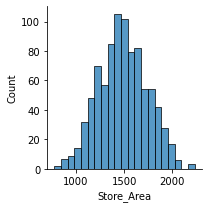

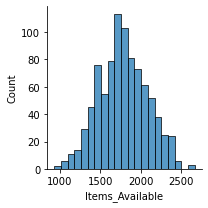

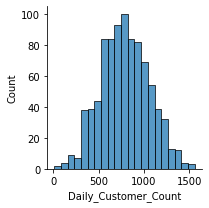

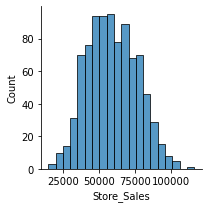

In [9]:
for col in stores.columns:
    sns.displot(stores[col], height=3)

In [10]:
stores['Sales_Rank']= stores['Store_Sales'].rank(ascending=False) #create Sales_Rank column
stores.sort_values(by='Sales_Rank', inplace=True)

In [11]:
stores.nlargest(n=5, columns='Store_Sales')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank
Store ID,,,,,
650,1989,2414,860,116320,1.0
869,1775,2104,980,105150,2.0
433,1365,1638,680,102920,3.0
409,1303,1587,1310,102310,4.0
759,1486,1758,820,101820,5.0


In [12]:
stores.nsmallest(n=5, columns='Store_Sales')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank
Store ID,,,,,
32,1250,1508,990,14920,896.0
853,1477,1790,880,16370,895.0
776,1537,1877,660,17670,894.0
594,1624,1946,870,20270,893.0
353,1397,1686,850,21300,892.0


Correlation between Data: wartości korelacji od 0 do 0,3 oznaczają słaby związek, od 0,3 do 0,5 związek umiarkowanie silny natomiast wartości od 0,5 do 1 mówi o związku silnym lub bardzo silnym)

## Correlation

Text(0.5, 1.0, '')

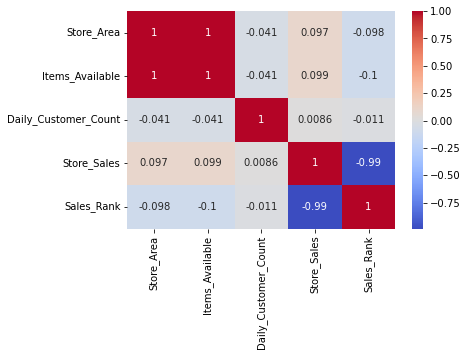

In [13]:

sns.heatmap(stores.iloc[:,:].corr(),annot=True,cmap="coolwarm" )
plt.title('')




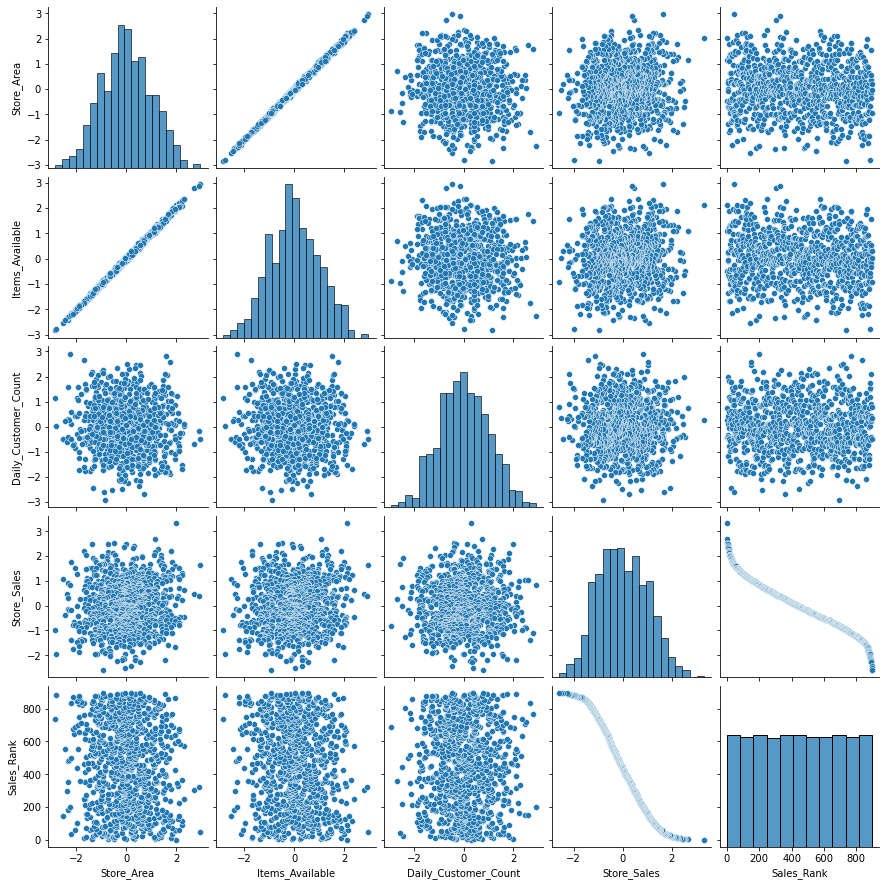

In [27]:
sns.pairplot(data=stores.iloc[:,0:5])

<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

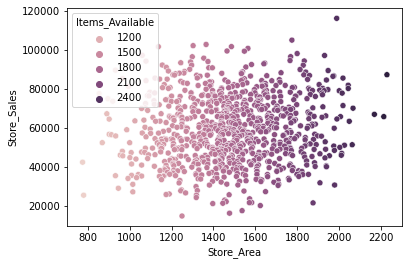

In [15]:
sns.scatterplot(x=stores.Store_Area, y = stores.Store_Sales, hue=stores.Items_Available)
# sns.regplot(x=stores.Store_Area, y = stores.Store_Sales) #scaterplot with regresion line
# sns.lmplot(x = 'Store_Area', y= 'Store_Sales',hue='Items_Available',data = stores) sns.lmplot command to add two regression lines based on hue


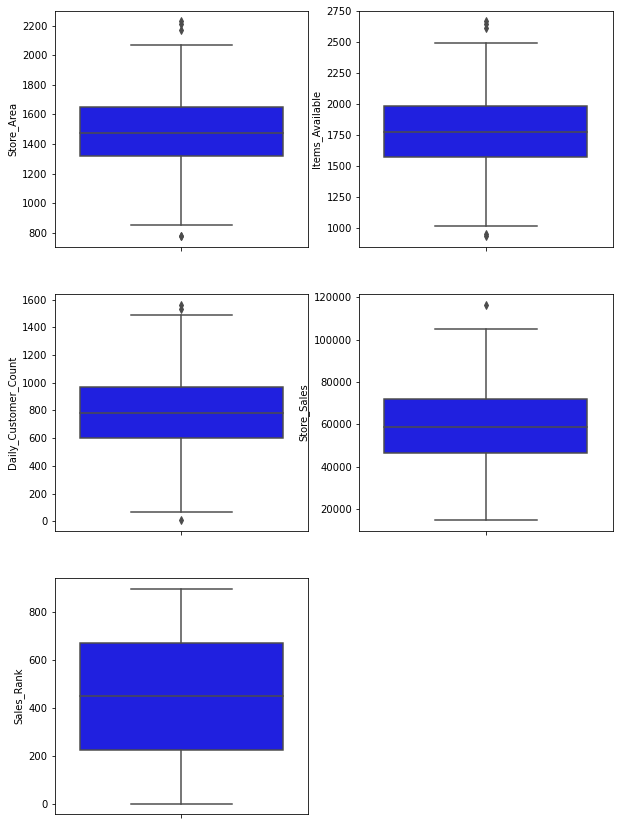

In [16]:
i=1
plt.figure(figsize=(10,20))
for feature in stores.columns:
    plt.subplot(4,2,i, )
    sns.boxplot(y=stores[feature],color='blue', )
    i+=1

(According to the unspoken rule, no more than 2% of the data should be deleted (no more than 20 lines of the dataset in this case).

<AxesSubplot:xlabel='Store ID '>

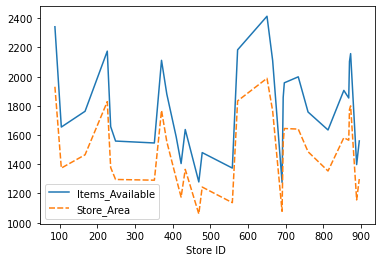

In [17]:
# sns.lineplot(data=(stores.Items_Available.head(30)))
# sns.lineplot(data=(stores.Store_Area.head(30)))  #the same in one line code:

sns.lineplot(data=(stores[['Items_Available','Store_Area']]).head(30))

In [18]:
features=['Store_Area', 'Items_Available','Daily_Customer_Count','Store_Sales']

<AxesSubplot:title={'center':'First 10 stores'}, xlabel='Store ID '>

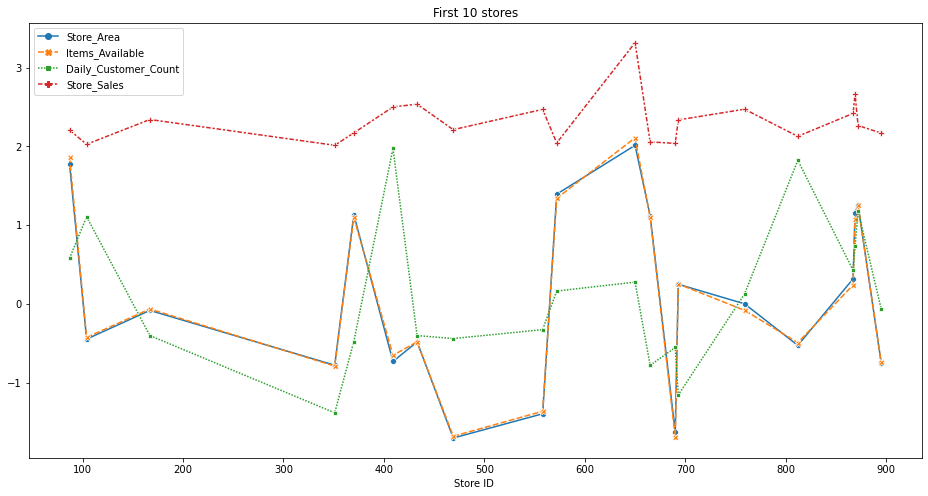

In [19]:
from sklearn.preprocessing import StandardScaler

# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("First 10 stores")

#Standarization
ss = StandardScaler()
stores[features] = ss.fit_transform(stores[features])
(stores[features]).head()
sns.lineplot(data=stores[features].head(20),markers=True, )


## ML

In [20]:

y = stores.Store_Sales
stores_features = ['Store_Area','Items_Available','Daily_Customer_Count']
X = stores[stores_features]

In [21]:
from sklearn.model_selection import train_test_split
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size=0.1)

In [5]:
from sklearn.tree import DecisionTreeRegressor
# Define model
stores_model = DecisionTreeRegressor(random_state=42)
# Fit model
stores_model.fit(train_X, train_y)
#
y_pred = stores_model.predict(val_X)

NameError: name 'train_X' is not defined

In [24]:
from sklearn.metrics import r2_score
r2_score(val_y, y_pred)*100


-116.00554665496992

In [28]:
from sklearn.metrics import mean_absolute_error
MEA = mean_absolute_error(val_y,y_pred)
print("actual: predicted:")
for i in range(5):
    print(val_y.iloc[i],  y_pred[i] )
print(f"MEA:{MEA}" )

actual: predicted:
1.0522402882083584 -0.9598489903717827
1.5318357656599164 0.7519110814547129
-0.9610130570646263 -0.7392583520779229
1.7943328048961456 -0.2940028420652506
-0.24394797427297635 -0.49655044662003484
MEA:1.0986849469288729


In [4]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'